In [1]:
import numpy as np
from tc_utils import *
from scipy.special import erf
import sys, os

c:\Users\henac\OneDrive - The University of Texas at Austin\01_RESEARCH\05_CMBS4\Cryogenic_Material_Properties\thermal_conductivity
[0.000249809, -0.00217074, 0.00520942, 0.00399669, 0.0, 0.0, 0.0, 0.0, 0.0] [0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0.0
lib\CFRP\RAW Crowley_Clearwater_0.25K_2022.csv lib\CFRP\RAW\Crowley_Clearwater_0.25K_2022.csv
lib\CFRP\RAW Crowley_Clearwater_0.27K_2022.csv lib\CFRP\RAW\Crowley_Clearwater_0.27K_2022.csv
lib\CFRP\RAW Crowley_Clearwater_0.36K_2022.csv lib\CFRP\RAW\Crowley_Clearwater_0.36K_2022.csv
lib\CFRP\RAW Crowley_Clearwater__0.1K_2022.csv lib\CFRP\RAW\Crowley_Clearwater__0.1K_2022.csv
lib\CFRP\RAW Crowley_Clearwater__0.5K_2022.csv lib\CFRP\RAW\Crowley_Clearwater__0.5K_2022.csv
lib\CFRP\RAW Crowley_DPP__0.3K_2022.csv lib\CFRP\RAW\Crowley_DPP__0.3K_2022.csv
lib\CFRP\RAW Crowley_DPP__1.4K_2022.csv lib\CFRP\RAW\Crowley_DPP__1.4K_2022.csv
lib\CFRP\RAW Crowley_Graphlite__1.4K_2022.csv lib\CFRP\RAW\Crowley_Graphlite__1.4K_2022.csv
lib\CFRP\RAW RunyanJones_Graphlite_

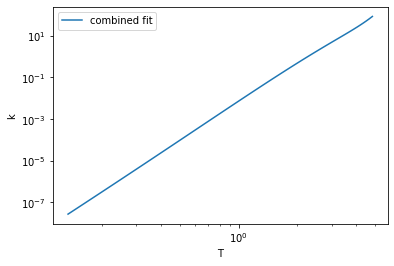

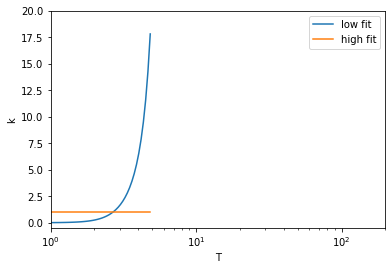

In [2]:
mat = "CFRP"
tc_file_date = "2024-05-28"


print(os.getcwd())
TCdata = np.loadtxt(f"..{os.sep}thermal_conductivity_compilation_{tc_file_date}.csv", dtype=str, delimiter=',')
headers = TCdata[0]
mat_names = TCdata[:,0]

mat_row = TCdata[int(np.argwhere(mat_names == mat))]
num_hi = sum(1 for c in headers[4:] if c.isupper())
num_low = sum(1 for c in headers[4:-1] if c.islower())
fit_params = mat_row
fit_params = np.char.replace(fit_params, "^", "0")
# fit_range, low_param, hi_param, erf_param = np.array(mat_row[2:4], dtype=float), np.array(fit_params[:num_low], dtype=float), np.array(fit_params[num_low:-1], dtype=float), float(fit_params[-1])

fit_range = np.array(mat_row[2:4], dtype=float)
# zip headers
# loop through headers and if lower case add to low_param etc

low_param = []
hi_param = []
for key in headers[4:]:
    if key.islower() and key != "erf param":
        low_param.append(float(fit_params[int(np.argwhere(headers == key))]))
    elif key.isupper():
        hi_param.append(float(fit_params[int(np.argwhere(headers == key))]))
    elif key == "erf param":
        erf_param = float(fit_params[int(np.argwhere(headers == key))])


T = np.logspace(np.log10(fit_range[0]),np.log10(fit_range[1]),100)


xs = np.logspace(np.log10(fit_range[0]),np.log10(fit_range[1]),100)
print(low_param, hi_param, erf_param)
big_data, data_dict = parse_raw(mat, f"lib\{mat}\RAW", plots=False)
# plot_datapoints(data_dict)
plt.plot(xs, loglog_func(xs, low_param, hi_param, erf_param), label='combined fit')
plt.semilogx()
plt.semilogy()
plt.ylabel("k")
plt.xlabel("T")
plt.legend()
plt.show()


low_fit = T*np.polyval(low_param, T)
hi_fit = 10**np.polyval(hi_param, np.log10(T))

plt.figure()
# plt.plot(xs, loglog_func(xs, low_param, hi_param, erf_param)/xs, label='combined fit')
plt.plot(xs, low_fit/xs, label='low fit')
plt.plot(xs, hi_fit, label='high fit')

plt.semilogx()
plt.ylabel("k")
plt.xlabel("T")
plt.xlim((1, 200))
plt.ylim((-0.5, 20))

plt.legend()
plt.show()